In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as scio
a = np.fromfile("data.dat",dtype = np.complex64)
# a = np.load('sample.npy')

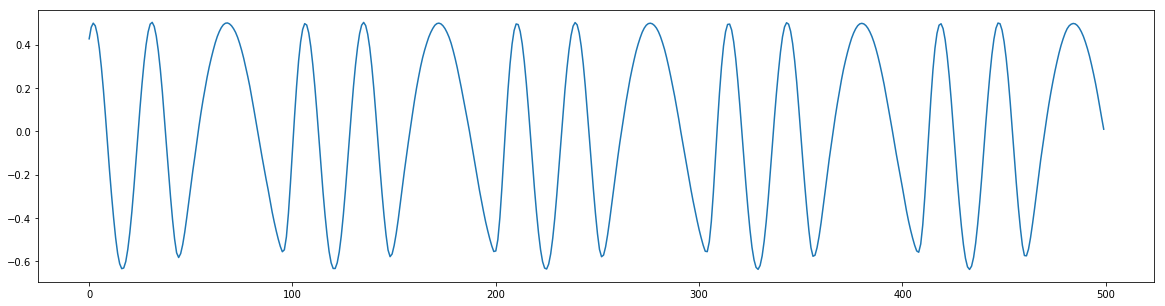

In [7]:
plt.figure(figsize=(20,5))
k = a[830000:842000]
# plt.plot(k)
plt.plot(k[2000:2500])
plt.show()
# from scipy.signal import find_peaks
# peaks = find_peaks(a[500500:501000])[0]
# print(peaks)
# m = (peaks[1:] - peaks[:-1]).mean()
# print(m)
# np.save('sample.npy', a[175000:175000+7000])

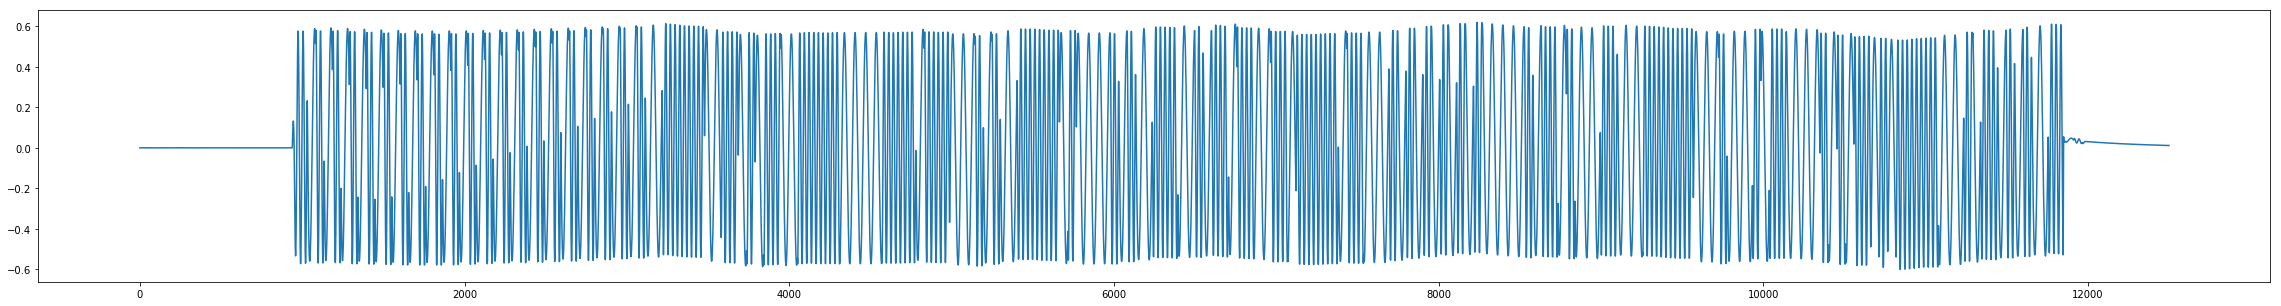

[ 6 10 15 21 25 29 32 35 38 44 46 48 50 54 60 62 64 67 73 78 80 83 86 88
 95]
3.7083333333333335


In [7]:
plt.figure(figsize=(40,5))
plt.plot(a[917500:930000])
plt.show()
from scipy.signal import find_peaks
peaks = find_peaks(a[10500:10600])[0]
print(peaks)
m = (peaks[1:] - peaks[:-1]).mean()
print(m)

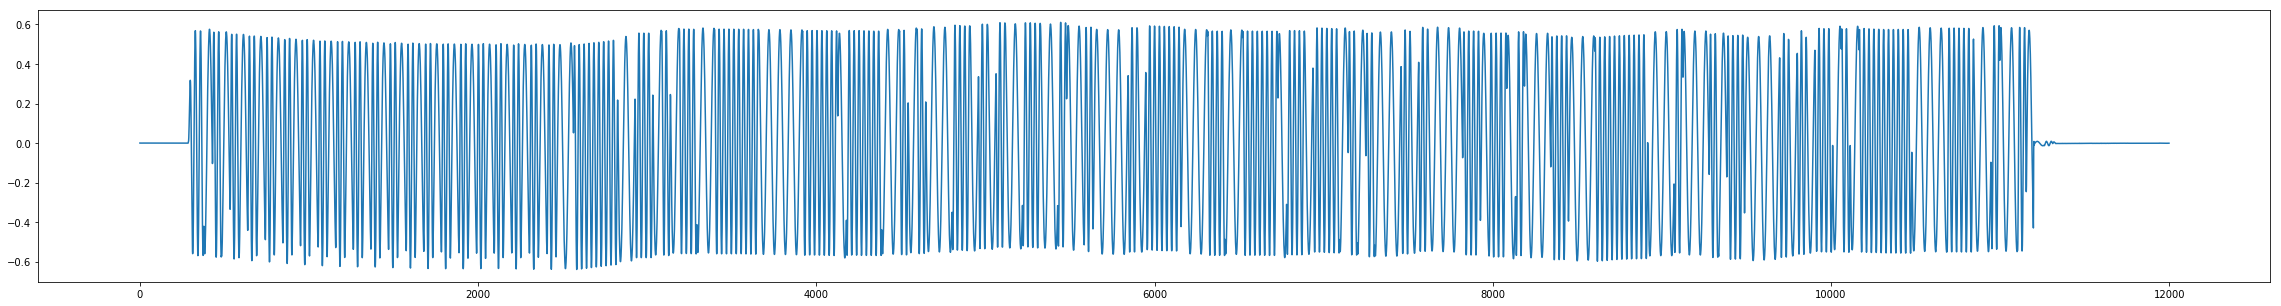

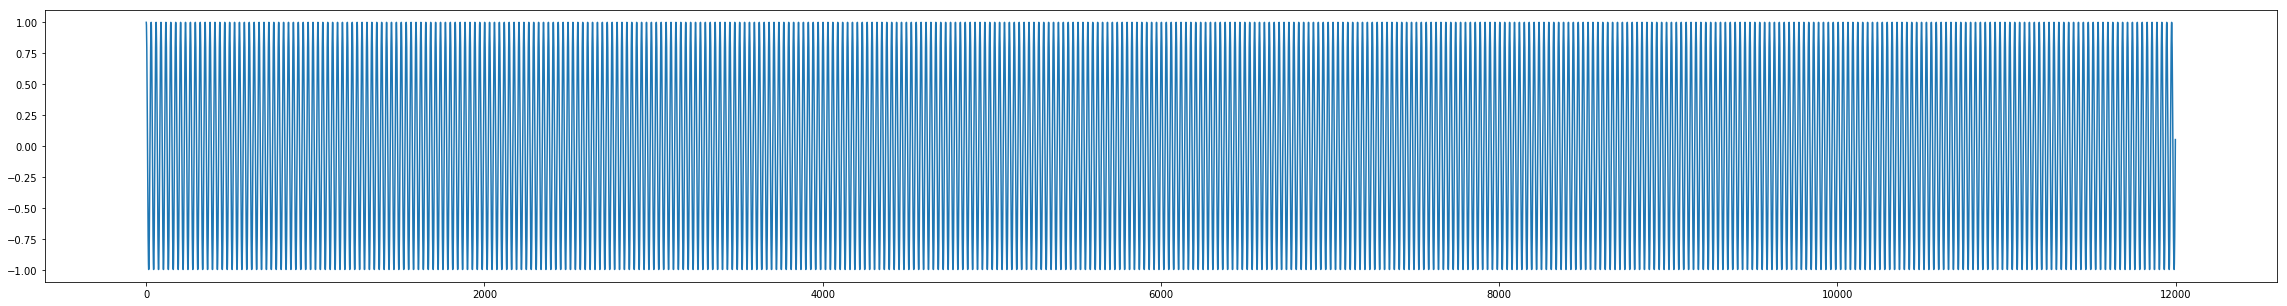

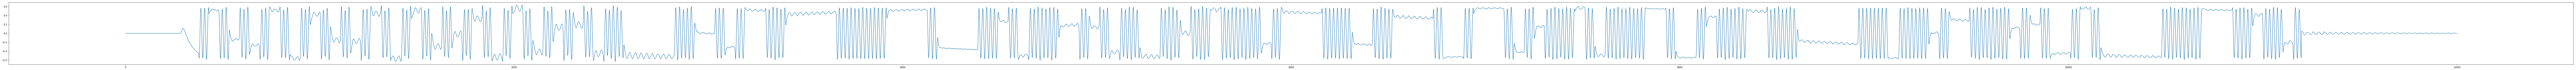

In [17]:
x = k
# x = a[300000:306000]
# print(x.dtype)
x1 = a[302500:303500]
y1 = a[304500:305500]
f1 = 1e6/65
f2 = -1e6/29 
fs = 1e6
num = x.size
t = np.arange(num) * 1/1e6
s = np.zeros(num, dtype = np.complex64)
s.real = np.cos(2 * np.pi * f2 * t)
s.imag = -np.sin(2 * np.pi * f2 * t)
result = x * s
plt.figure(figsize=(40,5))
plt.plot(x)
plt.figure(figsize=(40,5))
plt.plot(s)
plt.figure(figsize=(200,5))
plt.plot(result)
plt.show()

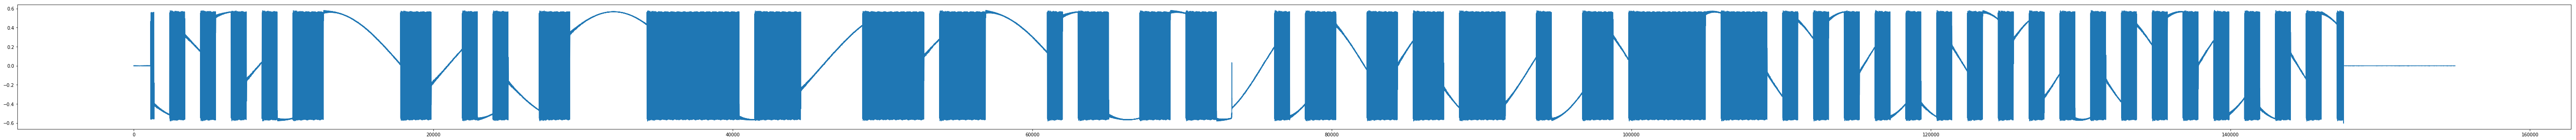

In [12]:
plt.figure(figsize=(100,5))
plt.plot(result)
plt.show()

200000


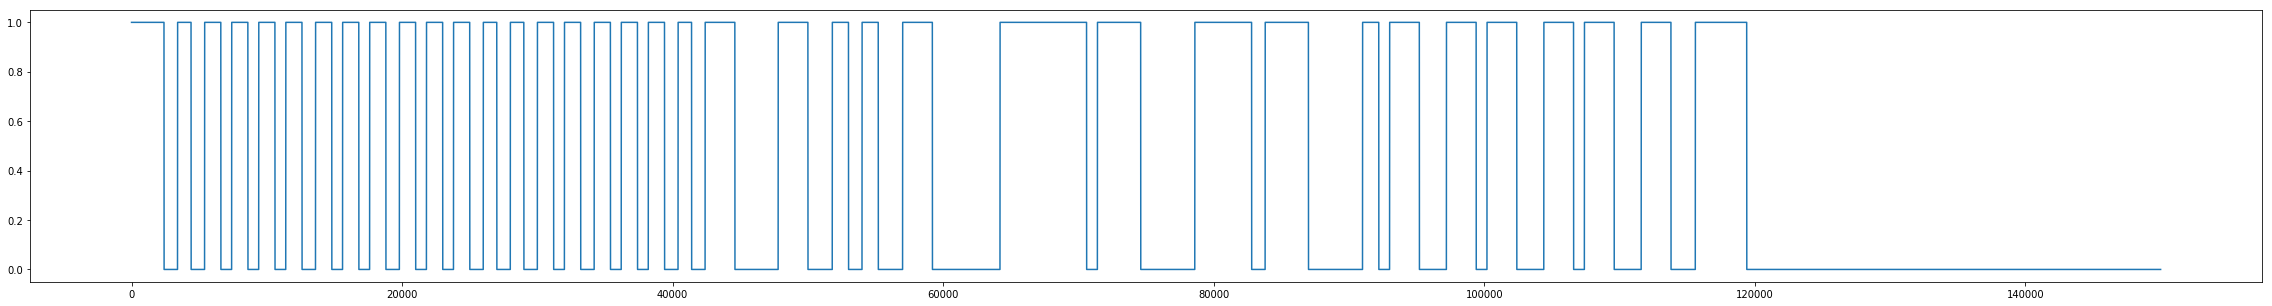

In [81]:
import scipy.signal as signal
from scipy import fftpack
hx = fftpack.hilbert(x)
hk = np.sqrt(x**2 + hx**2)
m = np.zeros(hk.size)
for i in range(0, hk.size-200, 200):
    hk[i:i+200] = hk[i:i+200].mean()
r = np.abs(hk>0.1)
print(r.size)
plt.figure(figsize=(40,5))
plt.plot(r[50000:])
plt.show()

In [82]:
r = r[50000:]
h =0
minl = 1000
bits = np.array([])
last = 0
for i in range(r.size-1):
    if r[i]!=r[i+1]:
        round((i - last)/1000)
    

[  2399.   3399.   4399.   5399.   6599.   7399.   8599.   9399.  10599.
  11399.  12599.  13599.  14799.  15599.  16799.  17599.  18799.  19799.
  20999.  21799.  22999.  23799.  24999.  25999.  26999.  27999.  28999.
  29999.  31199.  31999.  33199.  34199.  35399.  36199.  37399.  38199.
  39399.  40399.  41399.  42399.  44599.  47799.  49999.  51799.  52999.
  53999.  55199.  56999.  59199.  64199.  70599.  71399.  74599.  78599.
  82799.  83799.  86999.  90999.  92199.  92999.  95199.  97199.  99399.
 100199. 102399. 104399. 106599. 107399. 109599. 111599. 113799. 115599.
 119399.]
[2399. 1000. 1000. 1000. 1200.  800. 1200.  800. 1200.  800. 1200. 1000.
 1200.  800. 1200.  800. 1200. 1000. 1200.  800. 1200.  800. 1200. 1000.
 1000. 1000. 1000. 1000. 1200.  800. 1200. 1000. 1200.  800. 1200.  800.
 1200. 1000. 1000. 1000. 2200. 3200. 2200. 1800. 1200. 1000. 1200. 1800.
 2200. 5000. 6400.  800. 3200. 4000. 4200. 1000. 3200. 4000. 1200.  800.
 2200. 2000. 2200.  800. 2200. 2000. 2200

In [161]:
print(k.size)
print(d.size)

251
251


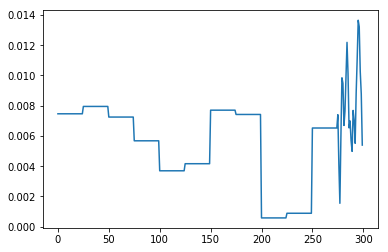

In [155]:
plt.plot(hk[5400:])
plt.show()

In [6]:
def LSRF(num):
    s = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
    result = [1]
    for i in range(num-1):
        s[9] = s[0] ^ s[5] 
        s = np.roll(s, -1)
        result.append(s[0]) 
    return np.array(result, dtype=np.int)
def convert(symbols):
    bits = np.array([], dtype = np.int)
    for symbol in symbols:
        for i in range(8):
            bits = np.append(bits, (symbol & 0x80 ) >> 7)
            symbol = symbol << 1
    return bits
# print(LSRF(8*10))
symbols = [9, 8, 7, 6, 5, 4, 3, 2, 1]
symbols = convert(symbols)
# for i in range(int(len(symbols)/8):
#     print(symbols[i*8:(i+1)*8])
whi = LSRF(18*8)
for i in range(int(len(whi)/8)):
    print(whi[i*8:(i+1)*8])
# symbols = symbols ^ whi
# for i in range(int(len(symbols)/8):
#     print(symbols[i*8:(i+1)*8])

[1 1 1 1 1 1 1 1]
[1 0 0 0 0 1 1 1]
[1 0 1 1 1 0 0 0]
[0 1 0 1 1 0 0 1]
[1 0 1 1 0 1 1 1]
[1 0 1 0 0 0 0 1]
[1 1 0 0 1 1 0 0]
[0 0 1 0 0 1 0 0]
[0 1 0 1 0 1 1 1]
[0 1 0 1 1 1 1 0]
[0 1 0 0 1 0 1 1]
[1 0 0 1 1 1 0 0]
[0 0 0 0 1 1 1 0]
[1 1 1 0 1 0 0 1]
[1 1 1 0 1 0 1 0]
[0 1 0 1 0 0 0 0]
[0 0 1 0 1 0 1 0]
[1 0 1 1 1 1 1 0]


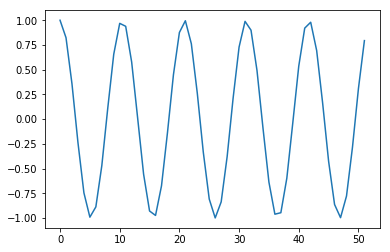

In [8]:
import numpy as np
import matplotlib.pyplot as plt
fdev = 96e3
datarate = 19200
samp_rate = 1e8
num = int(samp_rate *1.0 / datarate)
def get_fsk(l):
    fsk_lut = np.zeros(l, np.complex64)
    i = np.arange(l)
    t = i * 1.0 / samp_rate
    fsk_lut.real = np.cos(2*np.pi*fdev * t)
    fsk_lut.imag = np.sin(2*np.pi*fdev * t)
    return fsk_lut
def fsk_mod(bits):
    output = get_fsk(len(bits) * num)
    for i, bit in enumerate(bits):
        if not bit:
            output[i*num:(i+1)*num] = 0
    return output
plt.plot(get_fsk(52))
plt.show()

0


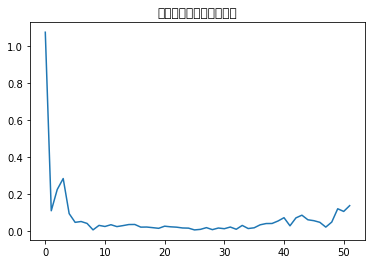

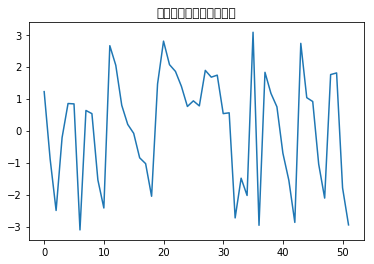

In [19]:
from scipy.fftpack import fft,ifft
fft_y=fft(a[51280:51280+52])
# print(fft_y.size)
 
abs_y=np.abs(fft_y)                # 取复数的绝对值，即复数的模(双边频谱)
angle_y=np.angle(fft_y)              #取复数的角度
print(abs_y[3:].argmax())
plt.figure()
plt.plot(abs_y)   
plt.title('双边振幅谱（未归一化）')
 
plt.figure()
plt.plot(angle_y)   
plt.title('双边相位谱（未归一化）')
plt.show()

In [68]:
100*1/19200

0.005208333333333333